In [1]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install tensorflow_datasets

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
(train_ds, val_ds, test_ds), metadata = tfds.load(
    'cats_vs_dogs',
    split=['train[:80%]', 'train[80%:90%]', 'train[90%:]'],
    with_info=True,
    as_supervised=True,
)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/23262 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/4.0.0.incomplete08I54W/cats_vs_dogs-train.tfrecord*...:   0%|…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.0. Subsequent calls will reuse this data.


In [5]:
get_label_name = metadata.features['label'].int2str

In [7]:
n=64
for i, (image, label) in enumerate(test_ds):
  if i== n-1:
    break

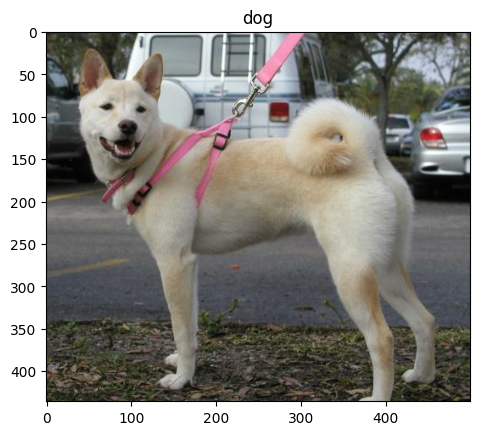

In [8]:
plt.imshow(image)
plt.title(get_label_name(label));

In [9]:
def visualize(original, augmented):
    fig = plt.figure()
    plt.subplot(1,2,1)
    plt.title('Original image')
    plt.imshow(original)
    plt.axis("off")
 
    plt.subplot(1,2,2)
    plt.title('Augmented image')
    plt.imshow(augmented)
    plt.axis("off")

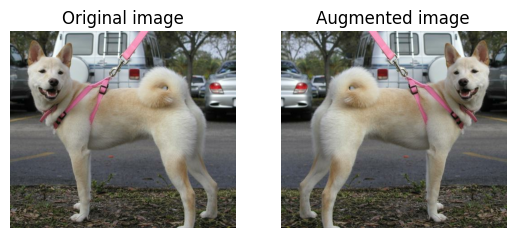

In [10]:
flipped = tf.image.flip_left_right(image)
visualize(image, flipped)

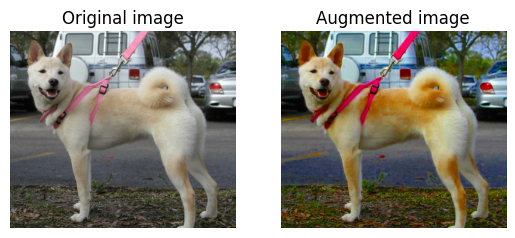

In [11]:
saturated = tf.image.adjust_saturation(image, 3)
visualize(image, saturated)
     

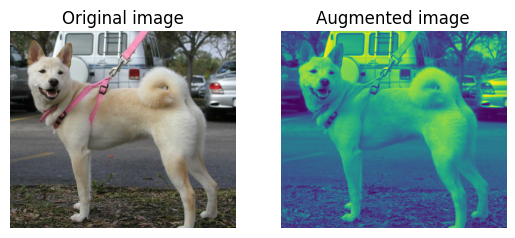

In [12]:
grayscaled = tf.image.rgb_to_grayscale(image)
visualize(image,  tf.squeeze(grayscaled))

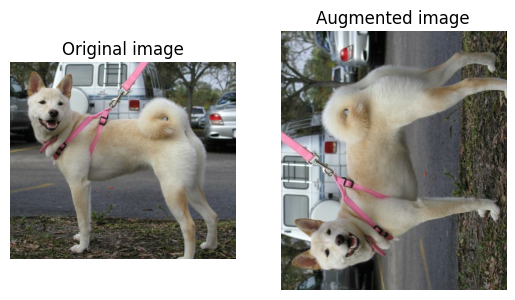

In [13]:
rotated = tf.image.rot90(image)
visualize(image, rotated)

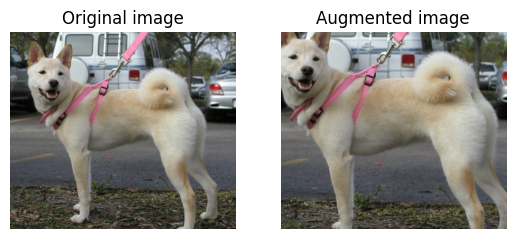

In [14]:
cropped = tf.image.central_crop(image, 
                                central_fraction=0.8)
visualize(image, cropped)

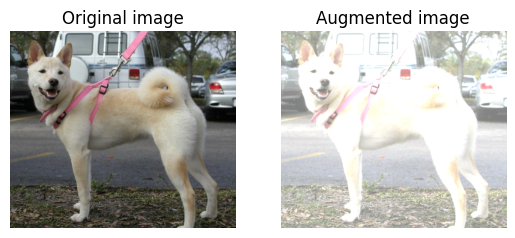

In [15]:
bright = tf.image.adjust_brightness(image, 0.5)
visualize(image, bright)

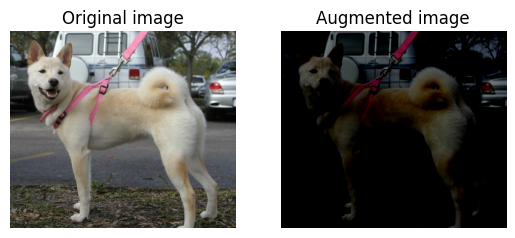

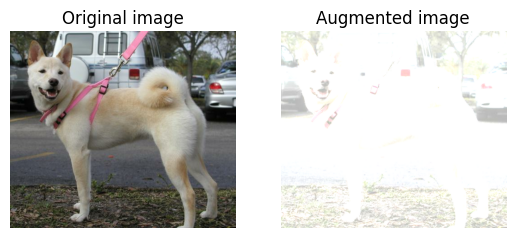

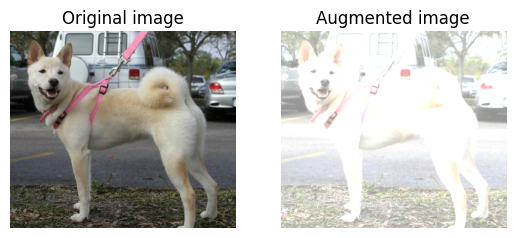

In [16]:
for i in range(3):
  seed = (i, 0)  # tuple of size (2,)
  stateless_random_brightness = tf.image.stateless_random_brightness(
      image, max_delta=0.95, seed=seed)
  visualize(image, stateless_random_brightness)